In [1]:

# import packages 
import pandas as pd 


#  read data set 

df = pd.read_csv("D:/files/diabetesIndia.csv")

# it will construct a data frame 

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# before dividing the data into trainset and test set 

# seperate inputs and outputs 

#  pregencies ----- age  === featutes or inputs 
#  outcome   -------------- output variable / label 

x  = df.iloc[ : , 0:8 ]

y  = df.iloc[: , 8]  # df.iloc[: , -1]

# y  = df.iloc[: , -1]

#  df.iloc
# data framew is a two dimension   rows columns 
#  df.iloc [ srow : erow , scolumn : ecolumn ]



In [3]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
#  import package train_test_Split 

from sklearn.model_selection import train_test_split 

#  pass both inputs and outputs 
#  input  train and test 
#  output also with tran and test set 

x_train , x_test , y_train , y_test =train_test_split(x,y,test_size = 0.2 )    # train_size      

# test_size = 0.2   train size = 80   test = 20 % 

# test_size = 0.3 train size = 70   test = 30 % 

#  x    x_train , x_test 
#  y    y_train , y_test 

# 

In [6]:
df.shape

(768, 9)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [8]:

#   3. shuffle the data , keep 70 to 80% for training , remaining 20 to
#30% for testing 


#x_train , x_test , y_train , y_test =train_test_split(x,y,test_size = 0.2 )

# by default = shuffle true 

#     shuffle  =  False 



In [10]:

# feature selection 
# if there are lot of features

from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=5)
# to fit the model 
results=bestfeatures.fit(x,y)

scores = pd.DataFrame(results.scores_)
columns = pd.DataFrame(x.columns)
featurescores = pd.concat([columns,scores],axis=1)

featurescores.columns= ["features","Score"]
print(featurescores.nlargest(5,"Score"))

# this step is optional because i have only limited features 

      features        Score
4      Insulin  2175.565273
1      Glucose  1411.887041
7          Age   181.303689
5          BMI   127.669343
0  Pregnancies   111.519691


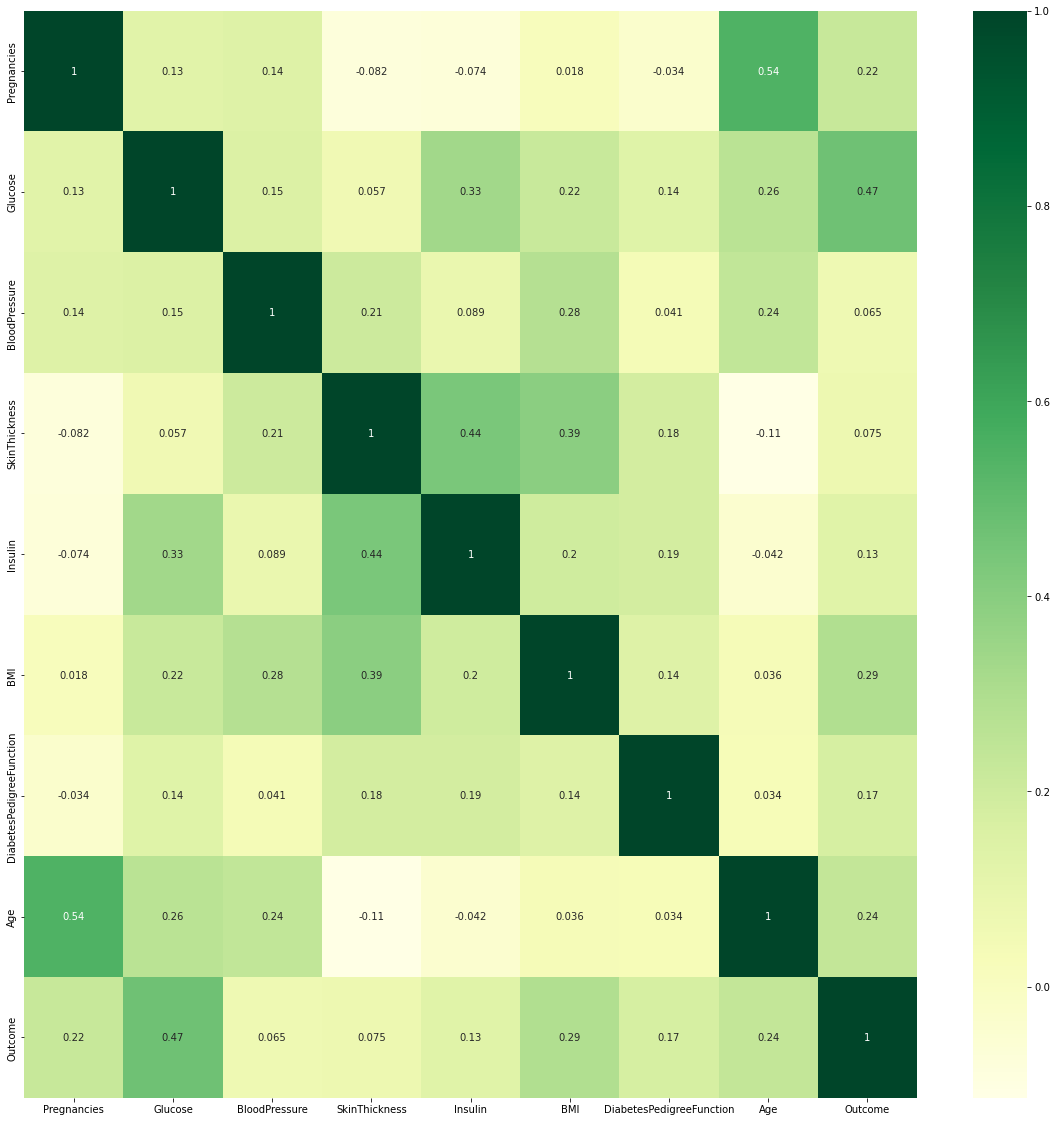

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr()
top_features = corrmat.index 
plt.figure(figsize = (20,20))
g=sns.heatmap(df[top_features].corr(),annot=True,cmap="YlGn")

In [12]:
# check any missing values 
# fillna , dropna 

#  mean  median mode   ffill bfill
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:

# removing outliers 
# outliers    ===  un expected values 

# ur team , architect , client they will specify what are the un expected 

# diabetes data set 

# a live human being blood pressure cannot be zero 



In [14]:
print("Total BP records with zero ",df[df.BloodPressure==0].shape[0])

Total BP records with zero  35


In [15]:
print("Total Insulin records with zero ",df[df.Insulin==0].shape[0])

Total Insulin records with zero  374


In [16]:
print("Total BMI records with zero ",df[df.BMI==0].shape[0])

Total BMI records with zero  11


In [17]:

# select the records where BP ! =0 bmi !=0 gluse!=0

df_new = df[(df.BloodPressure!=0)&(df.BMI!=0) &(df.Glucose!=0)]

In [18]:
df_new.shape

(724, 9)

In [19]:
df.shape

(768, 9)

In [20]:
# model construction 

# Decision tree classier 

from sklearn.tree import DecisionTreeClassifier 

# create an object for DT
dt_model = DecisionTreeClassifier()

# gini , entrpoy     ===  by default  gini 

# training the model 
# during training both inputs and ouput 

dt_model.fit(x_train,y_train)

# during testing  only inputs 

pred = dt_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

#  67 % 


0.7597402597402597


In [21]:
# parameter tunining in DT 


# model construction 

# Decision tree classier 

from sklearn.tree import DecisionTreeClassifier 

# create an object for DT
# citerion 
dt_model = DecisionTreeClassifier(criterion='entropy') 

# training the model 
# during training both inputs and ouput 

dt_model.fit(x_train,y_train)

# during testing  only inputs 

pred = dt_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)


0.7077922077922078


In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
score = accuracy_score(y_test,pred)
print(score)

0.7337662337662337


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[81, 26],
       [19, 28]], dtype=int64)

In [33]:

# max depth , min_samples_split , min_samples_lef 


from sklearn.tree import DecisionTreeClassifier 

# create an object for DT
# citerion 
dt_model = DecisionTreeClassifier(max_depth=2) 

# training the model 
# during training both inputs and ouput 

dt_model.fit(x_train,y_train)

# during testing  only inputs 

pred = dt_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

0.7207792207792207


In [34]:


from sklearn.tree import DecisionTreeClassifier 

# create an object for DT
# citerion 
dt_model = DecisionTreeClassifier(max_depth=10) 

# training the model 
# during training both inputs and ouput 

dt_model.fit(x_train,y_train)

# during testing  only inputs 

pred = dt_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

0.7077922077922078


In [35]:
from sklearn.tree import DecisionTreeClassifier 

# create an object for DT
# citerion 
dt_model = DecisionTreeClassifier(min_samples_split=10) 

# training the model 
# during training both inputs and ouput 

dt_model.fit(x_train,y_train)

# during testing  only inputs 

pred = dt_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

0.7012987012987013


In [20]:
from sklearn.tree import DecisionTreeClassifier 

# create an object for DT
# citerion 
dt_model = DecisionTreeClassifier(min_samples_split=100) 

# training the model 
# during training both inputs and ouput 

dt_model.fit(x_train,y_train)

# during testing  only inputs 

pred = dt_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

0.7077922077922078


In [1]:


# # Balancing the dataset 

# print("Total B records persons having diabetes ",df[df.Outcome==1].shape[0])
# print("Total BP records without diabetes  ",df[df.Outcome==0].shape[0])

In [2]:
# class 1  = 250 
# class 0  = 500

# imbalanced dataset 

# balancing 
# ==================

# class 1  = 500    oversampling
# class 0  = 500

# class 1  = 250     undersampling

# class 0  = 250

In [3]:
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.under_sampling import RandomUnderSampler 

In [4]:
# from collections import Counter 
# ros = RandomOverSampler()
# x_ros,y_ros = ros.fit_resample(x,y)
# print(Counter(y_ros))

In [5]:
# from collections import Counter 
# rus = RandomUnderSampler()
# x_rus,y_rus = rus.fit_resample(x,y)
# print(Counter(y_rus))

In [6]:
# # oversampling dataset 
# x_train,x_test,y_train,y_test =train_test_split(x_ros,y_ros,test_size= 0.3)

# from sklearn.tree import DecisionTreeClassifier 

# dt_model_over= DecisionTreeClassifier()

# # training phase 
# dt_model_over.fit(x_train,y_train)

# # testing
# pred= dt_model_over.predict(x_test)

# # accuracy
# from sklearn.metrics import accuracy_score
# score= accuracy_score(y_test,pred)
# print(score)

# # 80% of accuracy 

In [7]:
# # oversampling dataset 
# x_train,x_test,y_train,y_test =train_test_split(x_rus,y_rus,test_size= 0.3)

# from sklearn.tree import DecisionTreeClassifier 

# dt_model_under= DecisionTreeClassifier()

# # training phase 
# dt_model_under.fit(x_train,y_train)

# # testing
# pred= dt_model_under.predict(x_test)

# # accuracy
# from sklearn.metrics import accuracy_score
# score= accuracy_score(y_test,pred)
# print(score)


In [37]:

from sklearn.ensemble import RandomForestClassifier

# create an object for RFC
rf_model = RandomForestClassifier()  # by default it will construct 50 trees

# gini , entrpoy     ===  by default  gini 

# training the model 
# during training both inputs and ouput 

rf_model.fit(x_train,y_train)

# during testing  only inputs 

pred = rf_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

# 75.75 

0.7619047619047619


In [39]:
# create an object for RFC
rf_model = RandomForestClassifier(n_estimators=200)  # by default it will construct 50 trees

# gini , entrpoy     ===  by default  gini 

# training the model 
# during training both inputs and ouput 

rf_model.fit(x_train,y_train)

# during testing  only inputs 

pred = rf_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

0.7922077922077922


In [8]:

# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.under_sampling import RandomUnderSampler 

# from collections import Counter 
# ros = RandomOverSampler()
# x_ros,y_ros = ros.fit_resample(x,y)

# # oversampling dataset 
# x_train,x_test,y_train,y_test =train_test_split(x_ros,y_ros,test_size= 0.3)

# from sklearn.ensemble import RandomForestClassifier

# # create an object for RFC
# rf_model = RandomForestClassifier()  # by default it will construct 50 trees

# # gini , entrpoy     ===  by default  gini 

# # training the model 
# # during training both inputs and ouput 

# rf_model.fit(x_train,y_train)

# # during testing  only inputs 

# pred = rf_model.predict(x_test)  # y_test 

# # calculating accuracy 
# from sklearn.metrics import accuracy_score 
# score = accuracy_score(y_test,pred)
# print(score)

# # 85 percent accuracy 

In [40]:

from sklearn.neighbors import KNeighborsClassifier 

knn_model = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')  # by default it will construct 50 trees

# gini , entrpoy     ===  by default  gini 

# training the model 
# during training both inputs and ouput 

knn_model.fit(x_train,y_train)

# during testing  only inputs 

pred = knn_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)


0.6883116883116883


In [9]:
# import pandas as pd
# df = pd.read_csv("D:/files/diabetesIndia.csv")

# # Data set preparation 
# # train set and test set 

# from sklearn.model_selection import train_test_split 
# # train to train our model
# # test set to test our model 


# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.under_sampling import RandomUnderSampler 

# from collections import Counter 
# ros = RandomOverSampler()
# x_ros,y_ros = ros.fit_resample(x,y)

# # oversampling dataset 
# x_train,x_test,y_train,y_test =train_test_split(x_ros,y_ros,test_size= 0.3)

# from sklearn.neighbors import KNeighborsClassifier 

# knn_model = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')  # by default it will construct 50 trees

# # gini , entrpoy     ===  by default  gini 

# # training the model 
# # during training both inputs and ouput 

# knn_model.fit(x_train,y_train)

# # during testing  only inputs 

# pred = knn_model.predict(x_test)  # y_test 

# # calculating accuracy 
# from sklearn.metrics import accuracy_score 
# score = accuracy_score(y_test,pred)
# print(score)

In [41]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

# gini , entrpoy     ===  by default  gini 

# training the model 
# during training both inputs and ouput 

nb_model.fit(x_train,y_train)

# during testing  only inputs 

pred = nb_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)



0.7662337662337663


In [10]:
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.under_sampling import RandomUnderSampler 

# from collections import Counter 
# ros = RandomOverSampler()
# x_ros,y_ros = ros.fit_resample(x,y)

# # oversampling dataset 
# x_train,x_test,y_train,y_test =train_test_split(x_ros,y_ros,test_size= 0.3)

# from sklearn.naive_bayes import GaussianNB

# nb_model = GaussianNB()

# # gini , entrpoy     ===  by default  gini 

# # training the model 
# # during training both inputs and ouput 

# nb_model.fit(x_train,y_train)

# # during testing  only inputs 

# pred = nb_model.predict(x_test)  # y_test 

# # calculating accuracy 
# from sklearn.metrics import accuracy_score 
# score = accuracy_score(y_test,pred)
# print(score)



In [42]:
from sklearn.svm import SVC 
svm_model = SVC()

svm_model.fit(x_train,y_train)

# during testing  only inputs 

pred = svm_model.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)



0.7402597402597403


In [11]:
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.under_sampling import RandomUnderSampler 

# from collections import Counter 
# ros = RandomOverSampler()
# x_ros,y_ros = ros.fit_resample(x,y)

# # oversampling dataset 
# x_train,x_test,y_train,y_test =train_test_split(x_ros,y_ros,test_size= 0.3)

# from sklearn.svm import SVC 
# svm_model = SVC()

# svm_model.fit(x_train,y_train)

# # during testing  only inputs 

# pred = svm_model.predict(x_test)  # y_test 

# # calculating accuracy 
# from sklearn.metrics import accuracy_score 
# score = accuracy_score(y_test,pred)
# print(score)

In [3]:

#  rf_model   rf model object which is giving better accuracy 

import pickle 

pickle.dump(rf_model,open('final_diabetes_model.pickle','wb'))

# it will store in current working directory 



In [22]:
# boosting algorithms example 

# boosting can be applied both on top of classification and regression algorithms 

# adaboost 

from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.tree import DecisionTreeClassifier
# Read the data set 
import pandas as pd
df = pd.read_csv("D:/files/diabetesIndia.csv")

# Data set preparation 
# train set and test set 

from sklearn.model_selection import train_test_split 
# train to train our model
# test set to test our model 

# seperate inputs and outputs 
x = df.iloc[:,0:8]
y=  df.iloc[:,-1]  #  df.iloc[:,8]
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size= 0.3) 
dt=DecisionTreeClassifier()

ada= AdaBoostClassifier(n_estimators=100,base_estimator=dt,learning_rate=1)

# learning_rate=1  ==== means which will consider all weak learners

ada.fit(x_train,y_train)

# during testing  only inputs 

pred = ada.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

0.6926406926406926


In [24]:

# boosting algorithms example 

# boosting can be applied both on top of classification and regression algorithms 

# adaboost 

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import GradientBoostingRegressor 

gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=1,max_depth=1)

gbc.fit(x_train,y_train)

# during testing  only inputs 

pred = gbc.predict(x_test)  # y_test 

# calculating accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test,pred)
print(score)

0.7792207792207793


In [25]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
score=accuracy_score(y_test,pred)
print(score)


0.7792207792207793
